In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import econtools as econ
import econtools.metrics as mt
import math

In [2]:
df, meta = pyreadstat.read_sav("df.sav")

In [3]:
df.head()

,BYSID,BYHID,GENDER,BYSCLASS,region,schooltype,F2S01004,F2S01005,F2S01006,F2S01007,...,F3H12023,F3H12024,F3H12025,F3H12026,F3H12027,F3H13001,F3H13002,F3H13003,F3H13004,income_rank_p
0,1003.0,10031.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547619
1,1005.0,10051.0,1.0,1.0,15.0,5.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.380952
2,1007.0,10071.0,1.0,1.0,2.0,7.0,2.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.511905
3,1008.0,10081.0,1.0,1.0,8.0,7.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.452381
4,1010.0,10101.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333


<h2> Statistics </h2>

In [5]:
df['perf'] = df['favorablejudg']+df['negativejudg']
df['perfshare'] = df['perf'] / (df['perf'] + df['learning'])

In [13]:
df[['GENDER','region','schooltype','perf','perfshare','income']].describe().round(2).to_latex('descriptive.tex')

In [4]:
#goal list
goal_list = ['learning', 'betterperson', 'betterjob', 'futurework', 'forsociety', 'favorablejudg',  'popular',  'competition', 'forced', 'negativejudg',  'penalty']

In [5]:
df[goal_list]

,learning,betterperson,betterjob,futurework,forsociety,favorablejudg,popular,competition,forced,negativejudg,penalty
0,3.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,2.0,1.0
1,3.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,1.0
3,2.0,5.0,5.0,5.0,3.0,4.0,2.0,3.0,1.0,3.0,1.0
4,3.0,4.0,4.0,4.0,3.0,2.0,2.0,4.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2742,3.0,4.0,5.0,5.0,4.0,3.0,2.0,4.0,2.0,3.0,1.0
2743,2.0,4.0,4.0,3.0,3.0,2.0,1.0,2.0,5.0,2.0,5.0
2744,3.0,4.0,4.0,5.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0
2745,3.0,5.0,5.0,5.0,3.0,2.0,2.0,1.0,1.0,3.0,3.0


In [6]:
#mastery perf both are significant
#df['perfshare'] = df['negativejudg']+df['competition']/df['learning']+ df['betterperson']+df['negativejudg']+df['competition']
df['perf'] = df['negativejudg']+df['competition']
df['perfshare'] = (df['negativejudg']+df['competition'])/ (df['learning']+ df['betterperson']+df['negativejudg']+df['competition'])

y = df['perfshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	perfshare
N:			2747
R-squared:		0.0058
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.036 0.009 -3.761 0.000 -0.054  -0.017
region         0.000 0.000  0.617 0.537 -0.001   0.001
schooltype     0.001 0.001  1.206 0.228 -0.000   0.002
GENDER        -0.002 0.004 -0.634 0.526 -0.010   0.005
year           0.000 0.000 76.721 0.000  0.000   0.000

[[ 1.         -0.07066054]
 [-0.07066054  1.        ]]


In [7]:
df['mastery'] = df['learning'] + df['betterperson']
df['masteryshare'] = df['mastery'] / (df['negativejudg'] + df['mastery']+ df['competition'])
y = df['masteryshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'masteryshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	masteryshare
N:			2747
R-squared:		0.0059
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.035 0.009  3.752 0.000  0.017   0.054
region        -0.000 0.000 -0.623 0.533 -0.001   0.001
schooltype    -0.001 0.001 -1.233 0.218 -0.002   0.000
GENDER         0.002 0.004  0.634 0.526 -0.005   0.010
year           0.000 0.000 96.265 0.000  0.000   0.000

[[1.         0.07066054]
 [0.07066054 1.        ]]


In [10]:
# perf = fav + neg

df['perf'] = df['favorablejudg'] + df['negativejudg']
df['perfshare'] = df['perf']/ (df['learning'] + df['perf'])

exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	perfshare
N:			2747
R-squared:		0.0034
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se       t   p>t CI_low CI_high
income_rank_p -0.022 0.010  -2.232 0.026 -0.041  -0.003
region         0.000 0.000   0.874 0.382 -0.000   0.001
schooltype    -0.001 0.001  -1.113 0.266 -0.002   0.001
GENDER         0.001 0.004   0.365 0.715 -0.006   0.009
year           0.000 0.000 108.491 0.000  0.000   0.000

[[1.         0.07066054]
 [0.07066054 1.        ]]


In [11]:
# perf = fav + neg + competition

df['perf'] = df['favorablejudg'] + df['negativejudg'] + df['competition']
df['perfshare'] = df['perf']/ (df['learning'] + df['perf'])

exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	perfshare
N:			2747
R-squared:		0.0058
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se       t   p>t CI_low CI_high
income_rank_p -0.028 0.008  -3.366 0.001 -0.044  -0.011
region         0.000 0.000   0.626 0.531 -0.000   0.001
schooltype    -0.000 0.001  -0.936 0.350 -0.001   0.001
GENDER         0.002 0.003   0.554 0.580 -0.004   0.008
year           0.000 0.000 147.438 0.000  0.000   0.000

[[1.         0.07066054]
 [0.07066054 1.        ]]


<h2>Achievement Goal Proxy</h2>

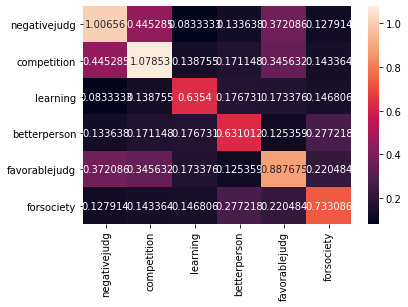

In [14]:
df3 = df[df['year']==2003]
goal_array = np.array([df3['negativejudg'],df3['competition'],df3['learning'],df3['betterperson'],df3['favorablejudg'],df3['forsociety']])

cov = np.cov(goal_array , bias = True)
goals = ['negativejudg','competition','learning','betterperson','favorablejudg','forsociety']

sns.heatmap(cov, annot = True, fmt= 'g', xticklabels = goals, yticklabels=goals )
plt.show()

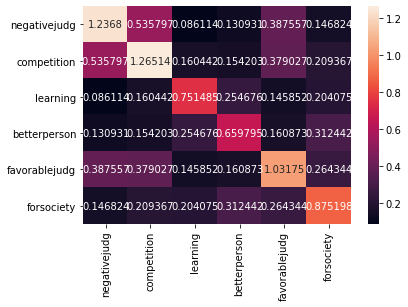

In [15]:
df4 = df[df['year']==2004]
goal_array = np.array([df4['negativejudg'],df4['competition'],df4['learning'],df4['betterperson'],df4['favorablejudg'],df4['forsociety']])

cov = np.cov(goal_array , bias = True)
goals = ['negativejudg','competition','learning','betterperson','favorablejudg','forsociety']

sns.heatmap(cov, annot = True, fmt= 'g', xticklabels = goals, yticklabels=goals )
plt.show()

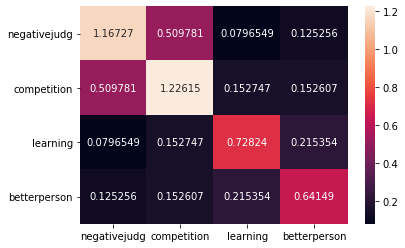

In [91]:
goal_array = np.array([df['negativejudg'],df['competition'],df['learning'],df['betterperson']])
cov = np.cov(goal_array , bias = True)
goals = ['negativejudg','competition','learning','betterperson'] #,'favorablejudg','forsociety']

htmap = sns.heatmap(cov, annot = True, fmt= 'g', xticklabels = goals, yticklabels=goals )
plt.show()

In [92]:
figure = htmap.get_figure()    
figure.savefig('goals_heatmap.png', dpi=400)

In [16]:
##### linear combination ###### - works well
var_neg = np.var(df['negativejudg'])
var_comp = np.var(df['competition'])
var_learn = np.var(df['learning'])
var_bp = np.var(df['betterperson'])

df['comb_perf'] = (var_neg*df['negativejudg'] + var_comp*df['competition']) / (var_neg + var_comp)
df['comb_mastery'] =(var_learn*df['learning'] + var_bp*df['betterperson']) / (var_learn + var_bp)
df['comb_perfshare']= df['comb_perf']/ (df['comb_mastery'] + df['comb_perf'])
df['comb_masteryshare'] = 1-df['comb_perfshare']

<h3> Achievement Goal Proxy - asymptotically normal </h3>

In [17]:
from scipy import stats
import math #math.log
from autograd import grad, jacobian
from sympy import Matrix, log

In [18]:
perf = np.array([df['negativejudg'],df['competition']])
perf_func =  np.log(perf[0]*perf[1])
# standard error
j_perf = jacobian(perf_func)
cov = np.cov(perf , bias = True)

In [19]:
alpha = 0.05
a,b  = stats.kstest(perf_func, 'norm')

In [71]:
if b < alpha: 
        print("the null hypothesis can be rejected")
else:
    print("the null hypothesis cannot be rejected")

the null hypothesis can be rejected


In [81]:
jacobian(perf_func)(np.array([perf]))

TypeError: 'numpy.ndarray' object is not callable

In [62]:
#se = cov.dot(j_perf.transpose())
X = Matrix(sympy.log(df['negativejudg']*df['competition']))
Y = Matrix(perf)
X.jacobian(Y)

Matrix([
[2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 1.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 4.0, 2.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 4.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 4.0, 1.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 1.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 1.0, 3.0, 5.0, 1.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 4.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 

In [25]:
# Kolmogorov-Smirnov test
#H0: Fs(x) is equal to Ft(x) for all x from -inf. to inf.
#HA: Fs(x) is not equal to Ft(x) for at least one x

alpha = 0.05
for i in goals:
    print(i)
    a,b  = stats.kstest(df[i], 'norm')
    print('Statistics', a, 'p-value',b)
    if b < alpha: 
        print("the null hypothesis can be rejected")
    else:
        print("the null hypothesis cannot be rejected")

negativejudg
Statistics 0.8413447460685429 p-value 0.0
the null hypothesis can be rejected
competition
Statistics 0.8413447460685429 p-value 0.0
the null hypothesis can be rejected
learning
Statistics 0.9280823342328822 p-value 0.0
the null hypothesis can be rejected
betterperson
Statistics 0.9652831666990632 p-value 0.0
the null hypothesis can be rejected
favorablejudg
Statistics 0.8679886817875128 p-value 0.0
the null hypothesis can be rejected
forsociety
Statistics 0.9559179221621226 p-value 0.0
the null hypothesis can be rejected


In [27]:
#D’Agostino’s K-squared test
#H0= The sample comes from a normal distribution.
#HA=The sample is not coming from normal distribution

alpha = 0.05
for i in goals:
    print(i)
    a,b  = stats.normaltest(df[i])
    print('Statistics', a, 'p-value',b)
    if b < alpha: 
        print("the null hypothesis can be rejected")
    else:
        print("the null hypothesis cannot be rejected")

negativejudg
Statistics 251.47275715599415 p-value 2.4739140614251536e-55
the null hypothesis can be rejected
competition
Statistics 295.18031813635974 p-value 7.987453327012754e-65
the null hypothesis can be rejected
learning
Statistics 7.09258691243182 p-value 0.02883130634906772
the null hypothesis can be rejected
betterperson
Statistics 417.50292891355815 p-value 2.1897316578943712e-91
the null hypothesis can be rejected
favorablejudg
Statistics 75.17010575386718 p-value 4.753559491129449e-17
the null hypothesis can be rejected
forsociety
Statistics 57.701360098270335 p-value 2.953308773038629e-13
the null hypothesis can be rejected


<h2>Main Analysis</h2>

In [20]:
#############################################
#완전 박제: 음수가 나왔어ㅠㅠㅠcomb_perfshare
############################################
y = df['comb_perf']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'comb_perf', exog))
print(np.corrcoef(x,y))

y = df['comb_perfshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'comb_perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	comb_perf
N:			2747
R-squared:		0.0103
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.007 0.091  0.073 0.941 -0.172   0.186
region         0.001 0.004  0.290 0.772 -0.006   0.009
schooltype     0.014 0.006  2.478 0.013  0.003   0.025
GENDER        -0.162 0.036 -4.546 0.000 -0.231  -0.092
year           0.001 0.000 47.466 0.000  0.001   0.001

[[1.         0.01259262]
 [0.01259262 1.        ]]
Dependent variable:	comb_perfshare
N:			2747
R-squared:		0.0058
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.036 0.009 -3.791 0.000 -0.055  -0.017
region         0.000 0.000  0.608 0.543 -0.001   0.001
schooltype     0.001 0.001  1.168 0.243 -0.000   0.002
GENDER        -0.002 0.004 -0.545 0.586 -0.009   0.005
year           0.000 0.000 76.872 0.000  0.000   0.000

[[ 1.         -0.07142023]
 [-0.07142023  1.        ]]

In [86]:
y = df['comb_mastery']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'comb_mastery', exog))
print(np.corrcoef(x,y))

y = df['comb_masteryshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'comb_masteryshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	comb_mastery
N:			3844
R-squared:		0.0387
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se       t   p>t CI_low CI_high
income_rank_p  0.712 0.101   7.035 0.000  0.514   0.911
region         0.001 0.004   0.159 0.873 -0.008   0.009
typeofschool   0.020 0.007   2.633 0.009  0.005   0.034
GENDER        -0.373 0.040  -9.265 0.000 -0.452  -0.294
year           0.003 0.000 103.941 0.000  0.003   0.003

[[1.         0.12126245]
 [0.12126245 1.        ]]
Dependent variable:	comb_masteryshare
N:			3844
R-squared:		0.0025
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.073 0.026  2.806 0.005  0.022   0.124
region        -0.001 0.001 -0.668 0.504 -0.003   0.001
typeofschool  -0.001 0.002 -0.359 0.720 -0.004   0.003
GENDER        -0.009 0.010 -0.855 0.393 -0.029   0.011
year          -0.000 0.000 -0.776 0.438 -0.000   0.000

[[1.         0.04722301]
 [0.04722301 1.  

In [39]:
np.corrcoef(df.loc[df['year']==2003, 'perf'],df.loc[df['year']==2003,'income_rank_p'])

array([[1.        , 0.05667437],
       [0.05667437, 1.        ]])

In [74]:
df['mastery'] = df['learning'] + df['betterperson']
df['masteryshare'] = df['mastery'] / (df['favorablejudg']+df['negativejudg'] + df['mastery']+ df['competition'])

In [75]:
np.corrcoef(df['negativejudg'], df['competition'])

array([[1.        , 0.42611332],
       [0.42611332, 1.        ]])

In [76]:
np.var(df['learning'])

0.7282398018019854

In [77]:
y = df['masteryshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'masteryshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	masteryshare
N:			3844
R-squared:		0.0193
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  1.041 0.230  4.522 0.000  0.590   1.492
region         0.009 0.010  0.893 0.372 -0.011   0.028
typeofschool   0.070 0.017  4.131 0.000  0.037   0.104
GENDER        -0.478 0.092 -5.223 0.000 -0.657  -0.299
year           0.007 0.000 98.214 0.000  0.007   0.007

[[1.         0.08403793]
 [0.08403793 1.        ]]


In [13]:
df['perf'] = df['favorablejudg']+df['negativejudg']+df['competition']
df['pefshare'] = df['perf'] / (df['perf'] + df['learning'] + df['betterperson'])

y = df['perfshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	perfshare
N:			2747
R-squared:		0.0058
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se       t   p>t CI_low CI_high
income_rank_p -0.028 0.008  -3.366 0.001 -0.044  -0.011
region         0.000 0.000   0.626 0.531 -0.000   0.001
schooltype    -0.000 0.001  -0.936 0.350 -0.001   0.001
GENDER         0.002 0.003   0.554 0.580 -0.004   0.008
year           0.000 0.000 147.438 0.000  0.000   0.000

[[ 1.         -0.06635932]
 [-0.06635932  1.        ]]


In [14]:
var_neg = np.var(df['negativejudg'])
var_comp = np.var(df['competition'])
var_fav = np.var(df['favorablejudg'])
var_learn = np.var(df['learning'])

df['perf'] = df['favorablejudg']+df['negativejudg']+df['competition']
df['pefshare'] = df['perf'] / (df['perf'] + df['learning'])

y = df['pefshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	perfshare
N:			2747
R-squared:		0.0058
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se       t   p>t CI_low CI_high
income_rank_p -0.028 0.008  -3.366 0.001 -0.044  -0.011
region         0.000 0.000   0.626 0.531 -0.000   0.001
schooltype    -0.000 0.001  -0.936 0.350 -0.001   0.001
GENDER         0.002 0.003   0.554 0.580 -0.004   0.008
year           0.000 0.000 147.438 0.000  0.000   0.000

[[ 1.         -0.07411686]
 [-0.07411686  1.        ]]


In [15]:
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
print(mt.reg(df, 'perf', exog))
print(np.corrcoef(x,y))

Dependent variable:	perf
N:			2747
R-squared:		0.0140
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.256 0.277  0.922 0.357 -0.288   0.800
region        -0.000 0.012 -0.034 0.973 -0.023   0.022
schooltype     0.018 0.017  1.056 0.291 -0.016   0.052
GENDER        -0.645 0.108 -5.960 0.000 -0.857  -0.433
year           0.005 0.000 54.913 0.000  0.004   0.005

[[ 1.         -0.07411686]
 [-0.07411686  1.        ]]


variance weight 는 별로 의미 없음
perf (neg, fav, comp) 자체가 income 에 대해 증가로 나옴 + insignificant -> 이거 significant 하게 만들 수 있는 control 더 찾아보기
더 안 찾아도 perf share는 significant 한 minus 임

<h2> Controls </h2>